In [10]:
import pandas as pd
import json
import numpy as np
from sklearn.metrics import f1_score

def csv_drive_path_generatoer(url:str):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path


# Y Actual

In [11]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1Rn4P-7QgSZ9ymH6aSvvrn_me4LORrWDi/view?usp=sharing')
y_test_actual = pd.read_csv(path,index_col=[0] )
y_test_actual.head()


,id,lable
911,911,0
2235,2235,1
3395,3395,1
1617,1617,1
4003,4003,0


# Instructions

Load the following json files [link](https://drive.google.com/drive/folders/19b008sfjF_lgvZcEh-nGKtxxmm0t4iZW):
1. "y_test_pseudo_prediction"
2. "y_test_random_prediction_better_than_random"


Run the following, once with `group = "y_test_pseudo_prediction"` and once with `group = "y_test_random_prediction_better_than_random"`


**After** you **understand the flow**, load your results, change the "`group`" variable to your group number and run it again

# Y pred

In [12]:
# group = 3
group = "y_test_pred"
#group = "y_test_random_prediction_better_than_random"

with open(f'{group}.json') as json_file:
    y_test_pred = json.load(json_file)


# Test

#### ids

In [13]:
if sorted([int(i) for i in list(y_test_pred.keys())]) == sorted(y_test_actual.id.tolist()):
  print("All ids exists and valid")
else:
  print("make sure there is no missing ids and the ids are in the right foramt (for example: 123.0 not valid, 123 valid)")


All ids exists and valid


Prediction object type

In [14]:
import numbers
valid_predictions = len([1 for x in y_test_pred.values() if not isinstance(x, int) ]) == 0

if valid_predictions:
  print("valid predictions")
else:
  print("not valid predictions, make sure there is no Nones, strings, floats or other not an integer format\
       \nfor example, 1.0 is not valid format, 1 is valid")


valid predictions


# f1

In [15]:
y_test_actual["predicted_labele"] = None

for i in y_test_actual.id:
  y_test_actual.loc[i,"predicted_labele"] = y_test_pred[str(i)]

y_test_actual.predicted_labele= y_test_actual.predicted_labele.astype(int)


In [16]:
f_1 = f1_score(y_test_actual.lable, y_test_actual.predicted_labele)

print(f"Your f1 on the test set is : {f_1}")


Your f1 on the test set is : 0.5772811918063315


# Confustion matrix

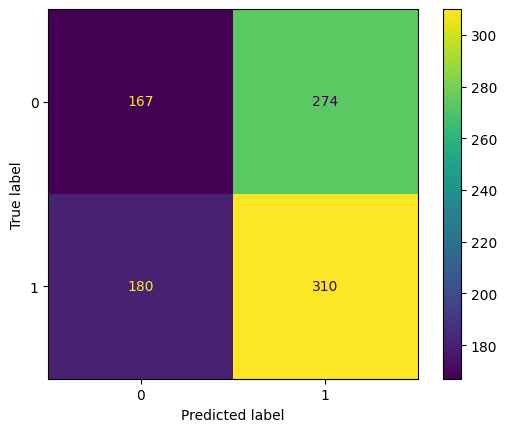

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_actual.lable, y_test_actual.predicted_labele, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.show()
